In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import nmc_verification.nmc_vf_base as nvb
import nmc_verification.nmc_vf_method as nvm
import nmc_verification.nmc_vf_product as nvp
import numpy as np
import datetime
import copy
import matplotlib.pyplot as plt

  在做预报检验时，数据提取和检验计算的通常是交织在一起的，在本程序中的nmc_vf_method模块中也是如此，在nmc_vf_method中至少计算检验中间量是和数据提取是交织在一起的。有时，我们面对一批预报和观测数据要开展检验工作时，事先并不知道后期要计算什么检验指标，这时需要反复尝试。由于数据提取和检验技术的代码交织在一起，意味着每次增删或更改检验指标时，数据提取的部分也需要重新运行一遍。另外上述问题也意味着想把数据提取部分的代码做进一步的封装难以实现或没有意义。  
  本程序库则为上述问题提供了解决方案，基于nvb_vf_base和nvb_vf_product中的函数，可以将检验过程分割以下三个部分：   
    1.数据收集(文件读取，[拼接合并](https://www.showdoc.cc/nmc?page_id=3777135637659548)）  
    2.[数据选取](https://www.showdoc.cc/nmc?page_id=3777179081910063)  
    3.检验计算   
 这为检验程序的进一步模块化提供了基础。以下结合具体的例子进行说明  

[本模块测试数据集简介和更详细的数据收集代码说明](https://www.showdoc.cc/nmc?page_id=3831227192066999) 

In [2]:
###################以下开始为数据收集部分的程序
dir_ob = r"H:\test_data\input\nvp\ob\temp_2m\BTYYMMDDHH.000"
dir_ec = r"H:\test_data\input\nvp\ec\temp_2m\YYMMDD\BTYYMMDDHH.TTT"
dir_grapes = r"H:\test_data\input\nvp\grapes\temp_2m\YYMMDD\BTYYMMDDHH.TTT"
time0 = datetime.datetime(2019,1,1,2,0)   
path = nvb.get_path(dir_ob,time0)
station = nvb.read_stadata_from_micaps3(path)
station.iloc[:,-1] = nvb.IV         
ob_sta_all = None

##读取收集观测数据

time_end = datetime.datetime(2020,1,1,2,0)
while time0 < time_end:
    path = nvb.get_path(dir_ob,time0)
    sta = nvb.read_stadata_from_micaps3(path,station = station,time = time0,dtime = 0,level = 0,data_name = "ob")
    ob_sta_all = nvb.combine_join(ob_sta_all,sta)
    time0 += datetime.timedelta(hours = 3)
    
##读取收集预报数据
ec_sta_all = None
grapes_sta_all = None
time0 =  datetime.datetime(2019,1,1,8,0)
time_end = datetime.datetime(2020,1,1,8,0)
while time0 < time_end:
    for dh in range(0,73,3):
        #读取ec预报数据
        path = nvb.get_path(dir_ec,time0,dh)
        grd = nvb.read_griddata_from_micaps4(path)
        if grd is not None:
            sta = nvb.interp_gs_linear(grd,station)
            nvb.set_stadata_coords(sta,time = time0,dtime = dh,level = 0)
            nvb.set_stadata_names(sta,["ecmwf"])
            ec_sta_all = nvb.combine_join(ec_sta_all,sta)
        
        #读取grapes预报数据
        path = nvb.get_path(dir_grapes,time0,dh)
        grd = nvb.read_griddata_from_micaps4(path)
        if grd is not None:
            sta = nvb.interp_gs_linear(grd,station)
            nvb.set_stadata_coords(sta,time = time0,dtime = dh,level = 0)
            nvb.set_stadata_names(sta,["grapes"])
            grapes_sta_all = nvb.combine_join(grapes_sta_all,sta)  
    time0 += datetime.timedelta(hours = 132)

#数据匹配合并
sta_all = nvb.combine_on_obTime(ob_sta_all,[ec_sta_all,grapes_sta_all])
sta_all = nvb.not_IV(sta_all)  #删除包含缺省值的样本
sta_all = nvb.not_equal_to(sta_all,9999)
###################以上开始为数据收集部分的程序

H:\test_data\input\nvp\ec\temp_2m\190101\BT19010108.000 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190101\BT19010108.000 is not exist
H:\test_data\input\nvp\ec\temp_2m\190101\BT19010108.003 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190101\BT19010108.003 is not exist
H:\test_data\input\nvp\ec\temp_2m\190101\BT19010108.006 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190101\BT19010108.006 is not exist
H:\test_data\input\nvp\ec\temp_2m\190101\BT19010108.009 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190101\BT19010108.009 is not exist
H:\test_data\input\nvp\ec\temp_2m\190101\BT19010108.012 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190101\BT19010108.012 is not exist
H:\test_data\input\nvp\ec\temp_2m\190101\BT19010108.015 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190101\BT19010108.015 is not exist
H:\test_data\input\nvp\ec\temp_2m\190101\BT19010108.018 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190101\BT19010108.018 is not exist
H:\tes

H:\test_data\input\nvp\grapes\temp_2m\190128\BT19012820.066 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190128\BT19012820.069 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190128\BT19012820.072 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190203\BT19020308.000 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190203\BT19020308.003 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190203\BT19020308.006 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190203\BT19020308.009 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190203\BT19020308.012 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190203\BT19020308.015 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190203\BT19020308.018 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190203\BT19020308.021 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190203\BT19020308.024 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190203\BT19020308.027 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190203\BT1902

H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.042 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.045 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.048 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.051 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.054 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.057 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.060 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.063 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.066 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.069 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190225\BT19022508.072 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190421\BT19042108.000 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190421\BT19042108.003 is not exist
H:\test_data\input\nvp\grapes\temp_2m\190421\BT1904

# 图片型检验产品制作   
**plot(sta_ob_and_fos,method,group_by = None,group_list_list = None,save_dir = None,para1 = None)**  
根据输入的站点数据和检验方法，生成图片型检验产品，并自动生成后缀名为.png的文件批量输出到指定目录  
  
**参数说明：**  
 **sta_ob_and_fos**:实况和预报合并对齐后的数据，形式为站点数据格式如上述例子中的sta_all      
 **method**: nmc_vf_method中的各类表格型的函数名称，例如在本页面中已经目前包括nvm.performance、 nvm.frequency_histogram、 nvm.scatter_regress、nvm.pdf_plot、nvm.box_plot_continue、nvm.reliability、nvm.roc、nvm.discrimination、nvm.comprehensive_probability、nvm.box_plot_ensemble、nvm.rank_histogram等函数           
 **group_by**: 对预报观测样本进行分组检验时的分组依据，缺省是为None，即不进行分组检验，非缺省时为字符串形式，可选项包括   
    "level" ，      按层次进行分组    
    "time"，       按起报时间分组   
    "year"，       按起报时间中的年份进行分组  
    "month",       按起报时间中的月份进行分组  
    "day",         按起报时间中的日期进行分组  
    "dayofyear",     按起报时间中的日期在一年中的排序（day_of_year）进行分组  
    "hour"，       按起报时间的小时数（hour_of_day）进行分组  
    "ob_time"，     按观测时间（起报时间+预报时效）进行分组  
    "ob_year"，     按观测时间（起报时间+预报时效）中的年份进行分组  
    "ob_month"，     按观测时间（起报时间+预报时效）中的月份进行分组  
    "ob_day"，      按观测时间（起报时间+预报时效）中的日期进行分组
    "ob_dayofyear"，  按观测时间（起报时间+预报时效）中的日期在一年中的排序（day_of_year）进行分组   
    "ob_hour"，      按观测时间（起报时间+预报时效）中的小时数（hour_of_day）进行分组     
    "dtime",        按预报时效进行分组  
    "dday"，        按预报时效包含的天数进行分组，例如预报时效为0、12、24和36小时的样本会分别被标记为 0、1、1和2  
    "dhour",        按预报时效整除24小时后的余数进行分组，例如预报时效为12、24和36小时的样本会分别被标记为 12，0和12  
    "id",          按站号进行分组  
 **group_list_list**: 指定分组方式，例如当group_by ="month"时，如果group_list_list = None，则每个月的样本都被分作一组，如果希望按季度分组，则可设置 group_list_list = [[2,3,4],[5,6,7],[8,9,10],[11,12,1]]   
 **save_dir**: 生成的表格文件的保存目录    
 **para1** : 检验方法 method 中除了ob、fo、save_path、title四个基本参数之外的第1个参数， 例如在nvm.scatter_regress(ob, fo,rtype = "linear",save_path=None,title = "散点回归图"):中 para1等价于的rtype   
 **return**: 返回实际分组的列表
 
  
**调用示例：**

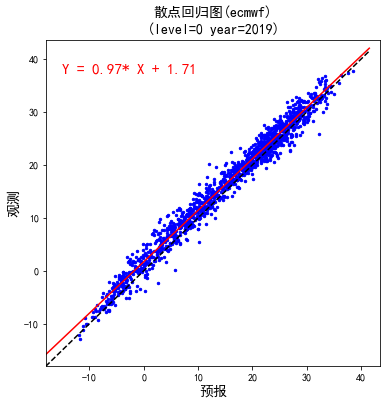

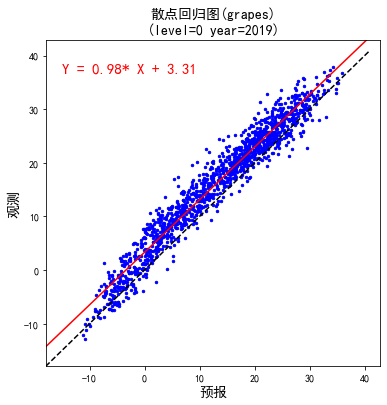

In [3]:
sta = nvb.in_id_list(sta_all,[54398])
nvp.plot(sta,nvm.scatter_regress) #整体检验，group_by = None

从上面的整体检验可以看出grapes模式在54398站上的温度预报存在系统性偏低的情况。如果想进一步分析不同时刻起报的预报是否都存在这样的问题，可以进一步设置group_by = "hour"来检验，如下：

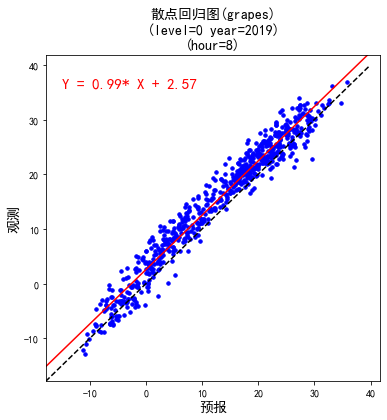

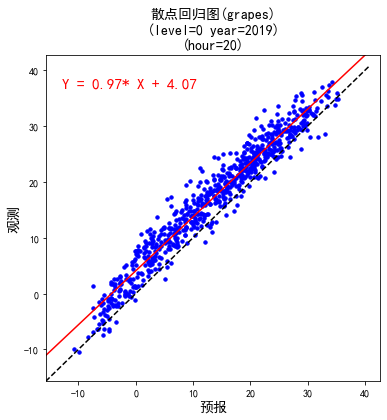

[[8], [20]]

In [4]:
sta = nvb.in_id_list(sta_all,[54398])
sta_grapes = nvb.in_member_list(sta,["ob","grapes"])
nvp.plot(sta_grapes,nvm.scatter_regress,group_by = "hour") 

In [5]:
#设置save_dir,程序自动生成文件名，将图片批量输出到指定文件夹中
nvp.plot(sta_grapes,nvm.scatter_regress,group_by = "hour",save_dir = r"H:\test_data\output\nvp\base\plot") 

检验结果已以图片形式保存至H:/test_data/output/nvp/base/plot/scatter_regress_grapes_hour[8].png
检验结果已以图片形式保存至H:/test_data/output/nvp/base/plot/scatter_regress_grapes_hour[20].png


[[8], [20]]

通过上面的检验分析可以发现grape在08和20时起报的预报都存在偏低的情况，其中20起报的预报误差偏差更显著。为此还可以进一步研究该偏差是否有日变化的趋势，为此可以进一步以group_by = "ob_hour"来分析。

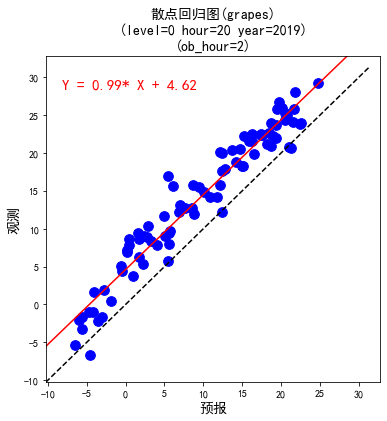

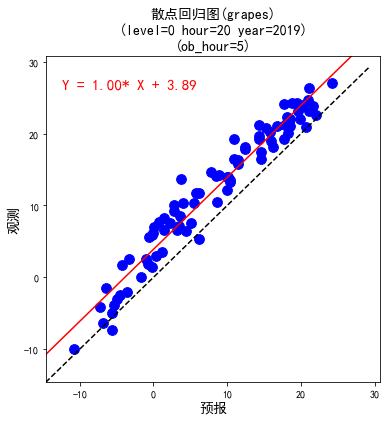

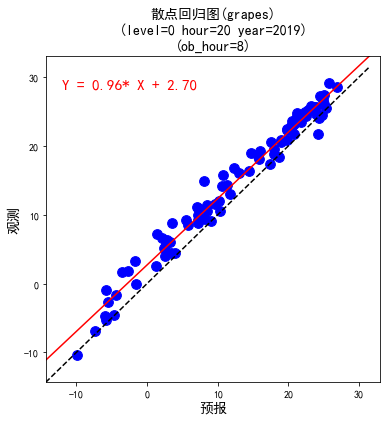

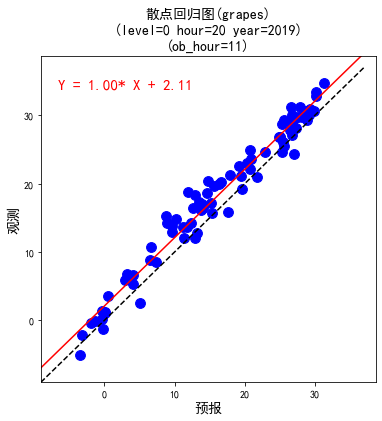

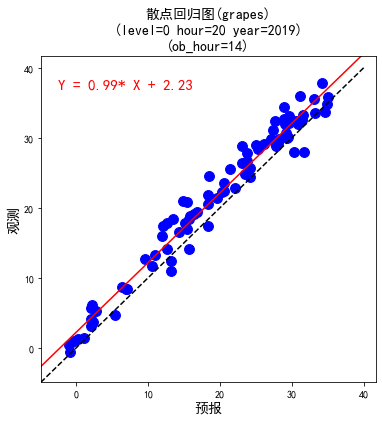

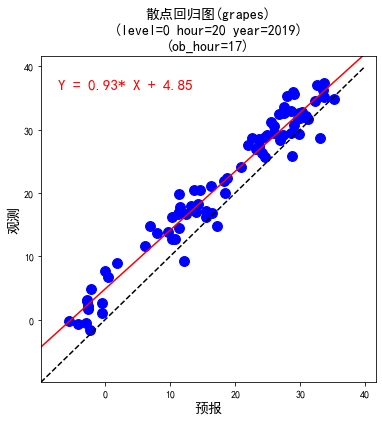

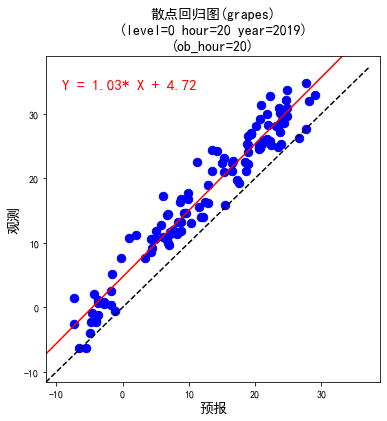

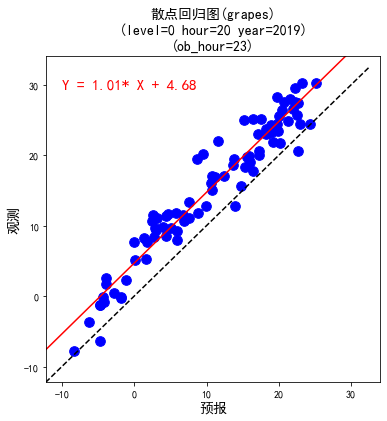

[[2], [5], [8], [11], [14], [17], [20], [23]]

In [6]:
sta_grapes = nvb.by_loc_dict(sta_all,{"hour":[20],"member":["ob","grapes"],"id":[54398]})  #选择20时起报的grapes预报
nvp.plot(sta_grapes,nvm.scatter_regress,group_by = "ob_hour") 

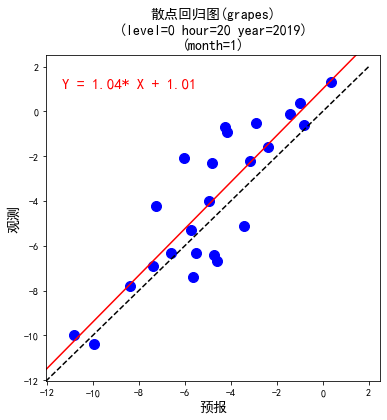

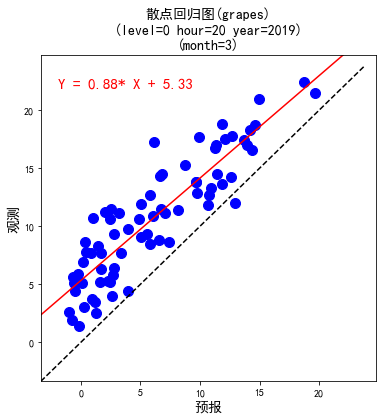

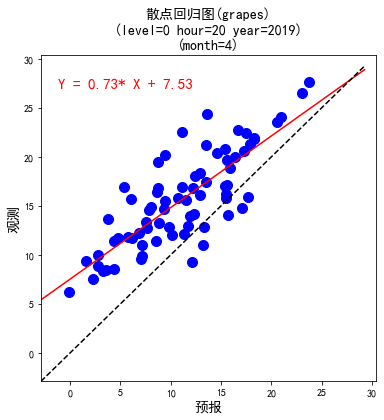

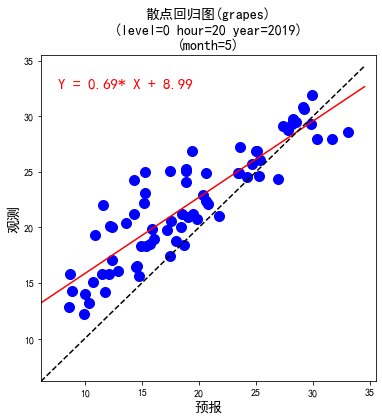

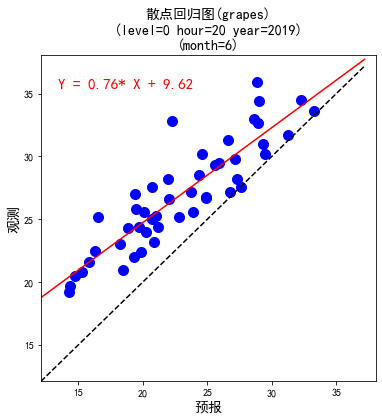

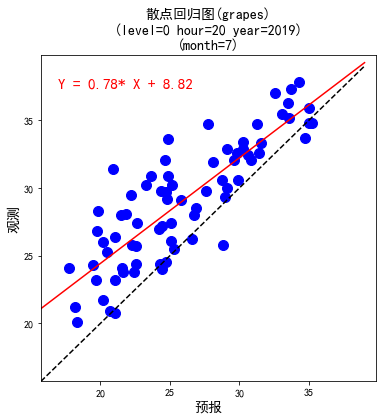

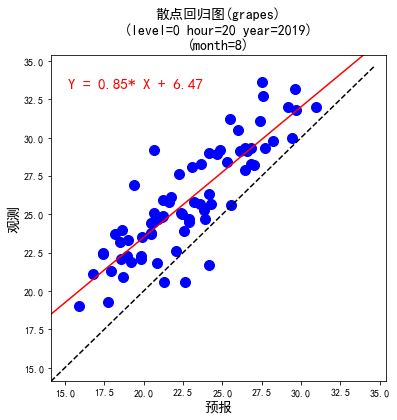

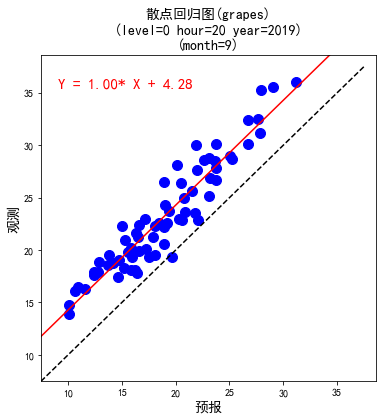

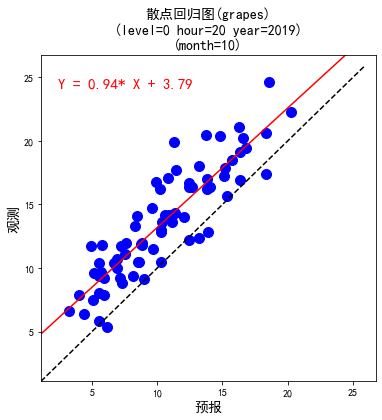

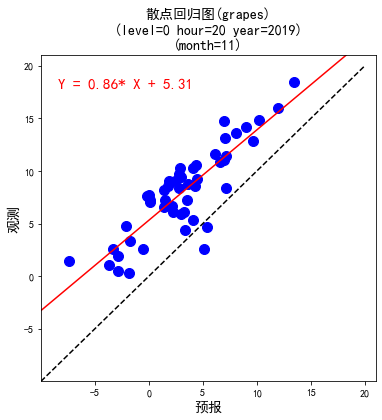

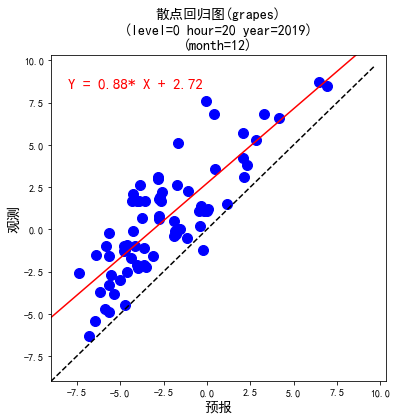

[[1], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12]]

In [7]:
nvp.plot(sta_grapes,nvm.scatter_regress,group_by = "month") 

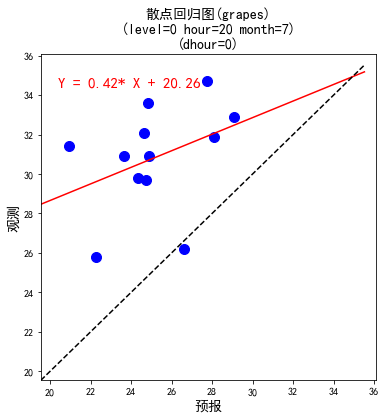

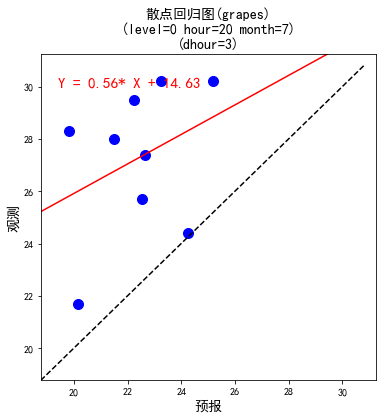

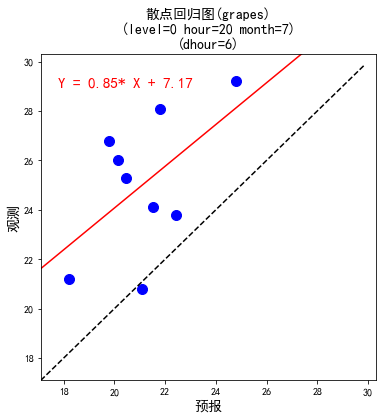

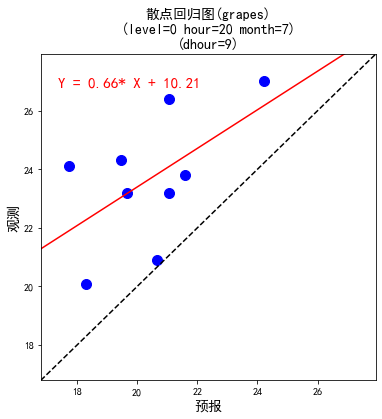

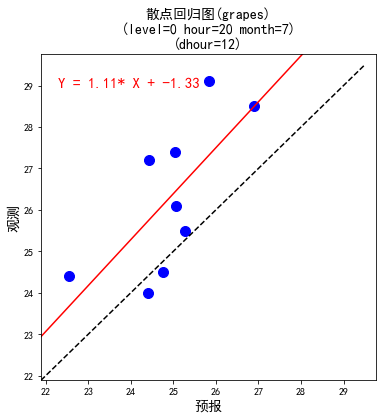

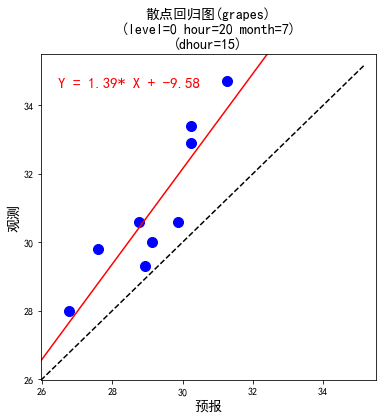

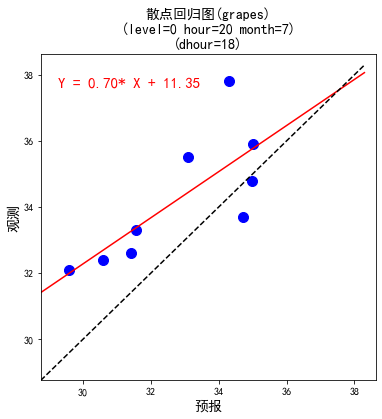

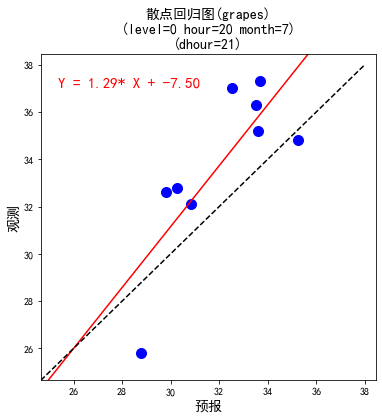

[[0], [3], [6], [9], [12], [15], [18], [21]]

In [8]:
sta_grapes = nvb.by_loc_dict(sta_all,{"hour":[20],"member":["ob","grapes"],"id":[54398],"month":[7]}) 
nvp.plot(sta_grapes,nvm.scatter_regress,group_by = "dhour")   #进一步选择7月份的数据，按时效的日周期展开分析

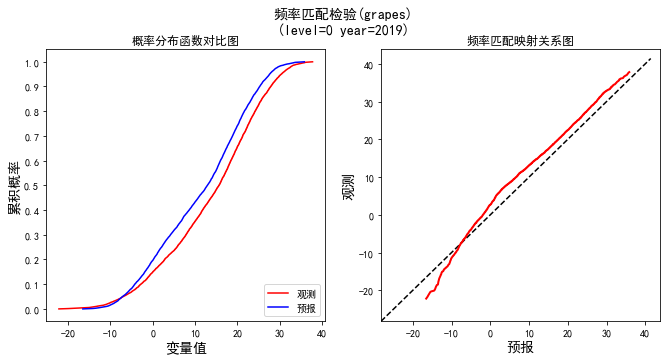

In [9]:
sta_grapes = nvb.in_member_list(sta_all,["ob","grapes"])
nvp.plot(sta_grapes,nvm.pdf_plot) 

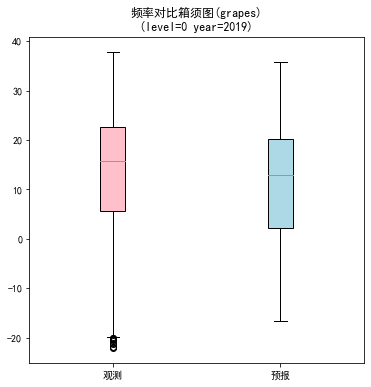

In [10]:
nvp.plot(sta_grapes,nvm.box_plot_continue) 

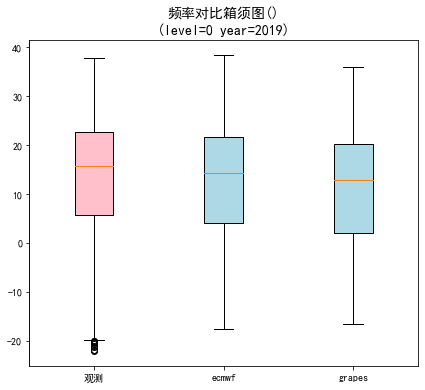

In [11]:
nvp.plot(sta_all,nvm.box_plot_ensemble) 

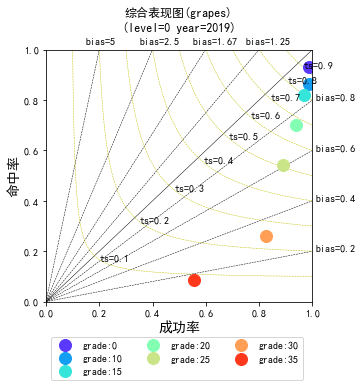

In [12]:
nvp.plot(sta_grapes,nvm.performance,para1 = [0,10,15,20,25,30,35])

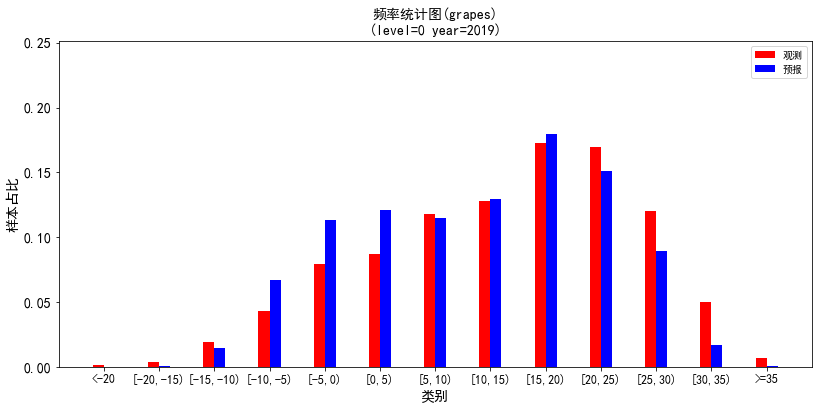

In [13]:
nvp.plot(sta_grapes,nvm.multi_category.plot.frequency_histogram,para1 = np.arange(-20,40,5).tolist())

In [14]:
#一下构造一个概率预报用于测试
import copy
sta_ec = nvb.in_member_list(sta_all,["ob","ecmwf"])  #提取观测和ec预报的温度数据
sta_ec = nvb.between_value_range(sta_ec,-4,4)        #测试数据中仅保留观测和预报的取值范围都在 -4 到4 之内的样本
sta_p0 =copy.deepcopy(sta_ec)          #开始构建概率预报，设预报的目标是观测值大于 0  的概率
p_ob = np.zeros(len(sta_p0.index))     #原始观测值小于0，则观测样本的概率值被记为0
p_ob[sta_p0["ob"]> 0] = 1              #原始观测值大于0，则观测样本的概率值记为1
sta_p0["ob"] = p_ob[:]
p_fo = (sta_p0["ecmwf"].values+4)/8    #概率预报 采用 原始预报的线性函数代表，取值范围会在0-1之间。
sta_p0["ecmwf"] = p_fo
print(sta_p0)    #打印构建的概率预报结果

      level                time  dtime     id    lon   lat   ob   ecmwf
13        0 2019-03-02 20:00:00      0  54410  116.1  40.6  1.0  0.7530
18        0 2019-03-08 08:00:00      0  54398  116.6  40.1  1.0  0.4915
20        0 2019-03-08 08:00:00      0  54416  116.9  40.4  0.0  0.3940
21        0 2019-03-08 08:00:00      0  54419  116.6  40.4  0.0  0.3460
22        0 2019-03-08 08:00:00      0  54499  116.2  40.2  1.0  0.2590
...     ...                 ...    ...    ...    ...   ...  ...     ...
8336      0 2019-12-13 20:00:00     72  54416  116.9  40.4  0.0  0.2430
8337      0 2019-12-13 20:00:00     72  54419  116.6  40.4  0.0  0.1170
8338      0 2019-12-13 20:00:00     72  54499  116.2  40.2  0.0  0.0915
8339      0 2019-12-13 20:00:00     72  54412  116.6  40.7  0.0  0.0055
8346      0 2019-12-24 20:00:00     72  54398  116.6  40.1  0.0  0.2285

[859 rows x 8 columns]


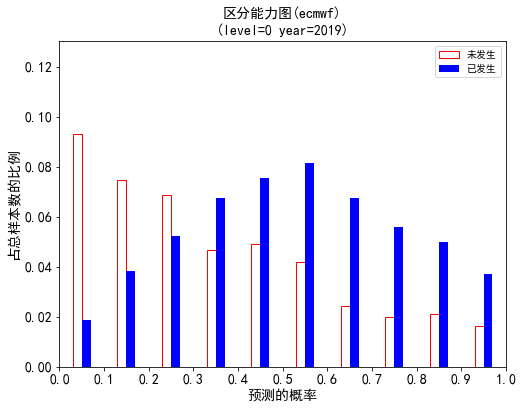

In [15]:
nvp.plot(sta_p0,nvm.probability.plot.discrimination)  #绘制概率预报区分能力图

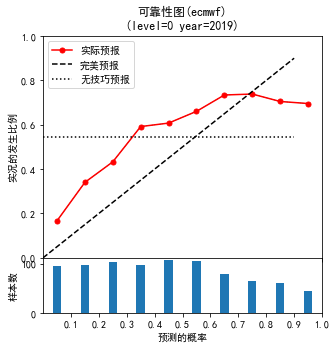

In [16]:
nvp.plot(sta_p0,nvm.probability.plot.reliability)  #绘制概率预报区分能力图

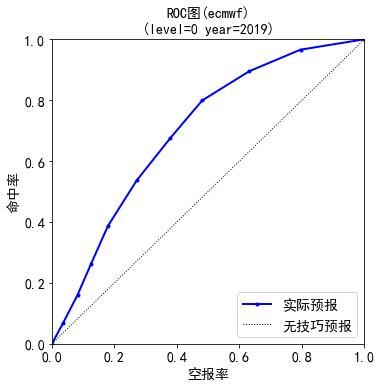

In [17]:
nvp.plot(sta_p0,nvm.probability.plot.roc)

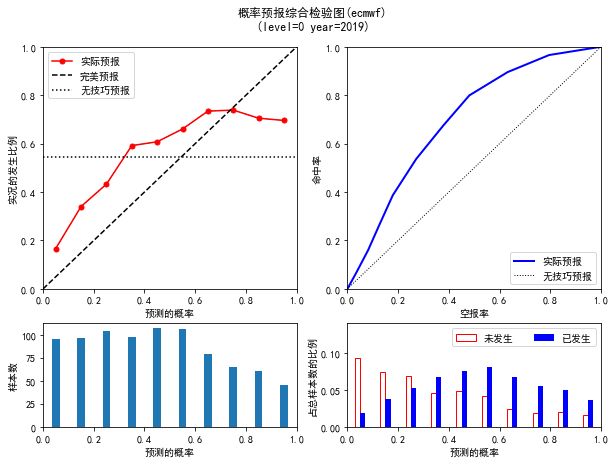

In [18]:
nvp.plot(sta_p0,nvm.probability.plot.comprehensive_probability)